# Feature Engineering (MaxTemperature)

In this step, this notebook will document the process used by the team to extract and derive features from RAW data. The common derived data sheds a light on,
- Spread and variance of data
- Averages, median, deviation etc.
- Time disparities of different souces of data
- Overall trends in data
- Correlations between features
etc.

## 1. Setup

In [10]:
# Imports
from PIL import Image
import numpy as np
import pandas as pd

In [11]:
# User Variables & Parameters
# Control Parameters
tmax_FileName           = 'tmax_'
tmax_DataPath           = '../../WaterBucket/data/isb/tmax/'
startYear               = 1961
endYear                 = 2018
numYears                = (endYear - startYear) + 1
fromMonth               = 1
toMonth                 = 12

# Processing Parameters
DF                      = pd.DataFrame()
filePathList            = []
fileIdentifier          = []
AVGList                 = []
MedianList              = []
MinList                 = []
MaxList                 = []
VarList                 = []
STDList                 = []

## 2. Reading Files

In [12]:
# Filename generation for batch processing
for y in range(startYear, endYear + 1):
    for m in range(fromMonth, toMonth + 1):

        # Handling case where month name is 01, 02, to 09
        monthName       = ''
        if m < 10:
            monthName   = '0' + str(m)
        else:
            monthName   = str(m)
        
        # Calculaing imagepath and searching if it exists on the system
        fileName        = tmax_FileName + str(y) + '-' + str(monthName) + '.tif'
        imagePath       = tmax_DataPath + fileName
        identifier      = str(monthName) + '-' + str(y)

        fileIdentifier.append(identifier)
        filePathList.append(imagePath)

In [13]:
# To ensure all filepaths and identifiers are generated correctly
# print(filePathList, fileIdentifier)

## 3. Feature Engineering

In [14]:
for filePath in filePathList:

    # Loading in files one by one
    currentFile         = Image.open(filePath)
    print("Working on: ", filePath)

    # Making derived variables
    npFile              = np.array(currentFile)
    AVGList.append(np.nanmean(npFile))
    MedianList.append(np.nanmedian(npFile))
    MinList.append(np.nanmin(npFile))
    MaxList.append(np.nanmax(npFile))
    VarList.append(np.nanvar(npFile))
    STDList.append(np.nanstd(npFile))

Working on:  ../../WaterBucket/data/isb/tmax/tmax_1961-01.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1961-02.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1961-03.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1961-04.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1961-05.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1961-06.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1961-07.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1961-08.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1961-09.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1961-10.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1961-11.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1961-12.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1962-01.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1962-02.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1962-03.tif
Working on:  ../../WaterBucket/data/isb/tmax/tmax_1962-04.tif
Working 

In [15]:
DF['tmax_FileName']             = fileIdentifier
DF['tmax_AverageValues']        = AVGList
DF['tmax_MedianValues']         = MedianList
DF['tmax_MinValues']            = MinList
DF['tmax_MaxValues']            = MaxList
DF['tmax_Variance']             = VarList
DF['tmax_StandardDeviation']    = STDList

In [16]:
DF

,tmax_FileName,tmax_AverageValues,tmax_MedianValues,tmax_MinValues,tmax_MaxValues,tmax_Variance,tmax_StandardDeviation
0,01-1961,16.486372,17.463238,7.840518,18.887201,4.577271,2.139456
1,02-1961,15.536664,16.603575,5.517325,18.514977,6.590564,2.567209
2,03-1961,22.634838,23.569111,12.680821,25.820471,6.333171,2.516579
3,04-1961,27.623022,28.878399,16.427891,31.155895,9.358387,3.059148
4,05-1961,34.080776,35.551315,22.026114,37.801418,11.455166,3.384548
...,...,...,...,...,...,...,...
691,08-2018,32.770985,33.771492,24.617922,35.540348,5.372719,2.317913
692,09-2018,32.049271,33.134056,22.720482,35.055302,6.642134,2.577234
693,10-2018,28.672216,29.745035,19.171915,31.792461,6.895599,2.625947
694,11-2018,23.605591,24.606108,14.876918,26.255333,5.546640,2.355130


<AxesSubplot:>

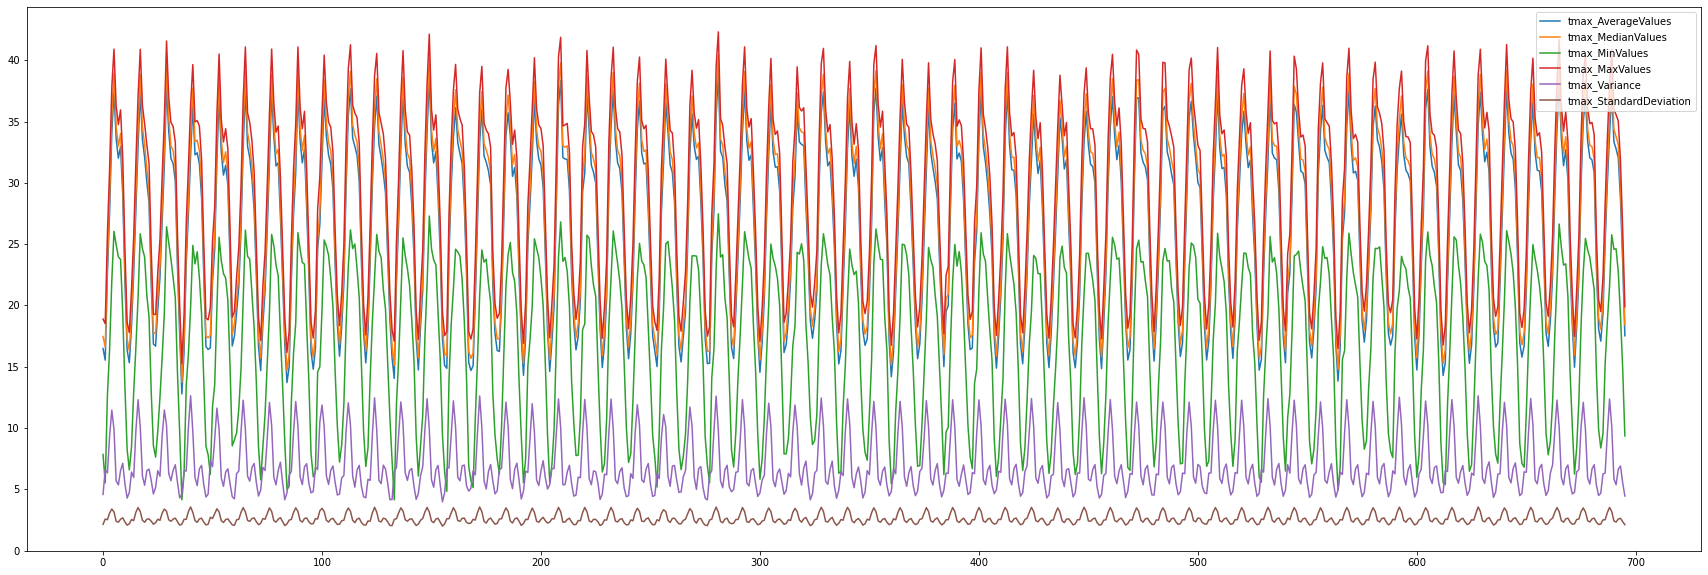

In [17]:
DF.plot.line(figsize=((30,10)))

In [18]:
pd.DataFrame.to_csv(DF, '../output/tmax_ISB.csv')